In [1]:
import pickle

# Specify the path to your .p file
file_path = "/Users/tianyichen/Desktop/Research /PhDresearch/Twitters/2024-06-10-tweets-with-text.p"

# Open the file in binary mode
with open(file_path, "rb") as file:
    # Load the data from the file
    data = pickle.load(file)


In [3]:
from wordcloud import STOPWORDS
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
D_text=' '.join(data[data['party']=='D']['text'])

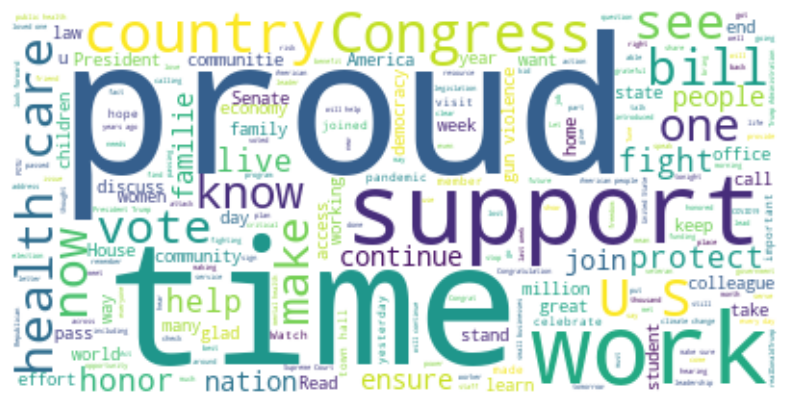

In [8]:
stop_words = ['link','need','today','Thank','Thanks'] + list(STOPWORDS)
wordcloud = WordCloud(stopwords = stop_words, background_color="white").generate(D_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [5]:
R_text=' '.join(data[data['party']=='R']['text'])

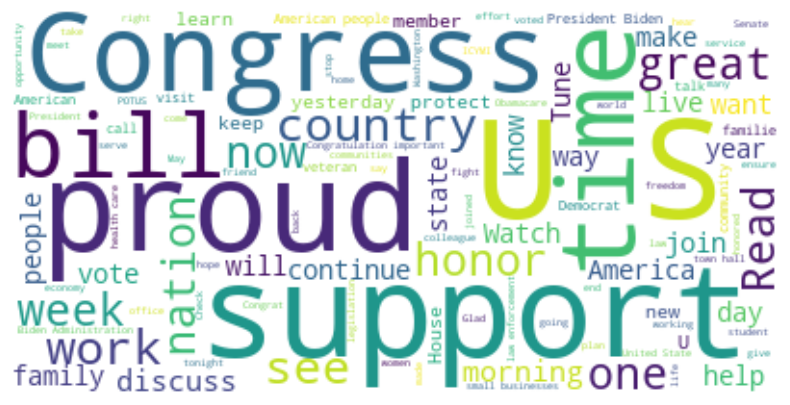

In [9]:

stop_words =  ['link','need','today','Thank','Thanks'] + list(STOPWORDS) 
wordcloud = WordCloud(stopwords = stop_words, background_color="white").generate(R_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [31]:
text = ' '.join(data['text'])

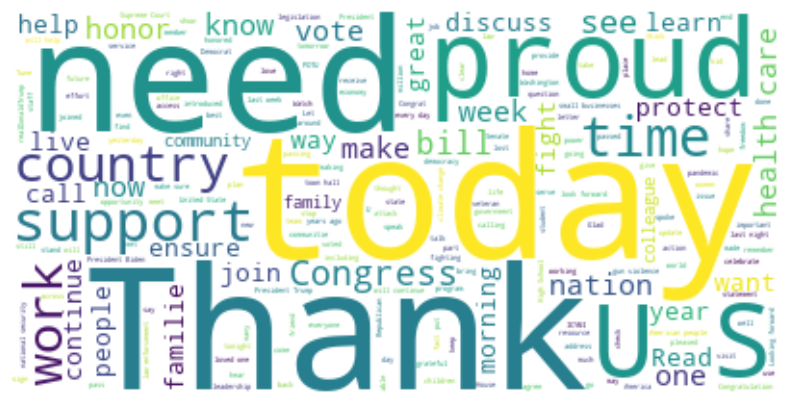

In [32]:
stop_words = ['link'] + list(STOPWORDS)
wordcloud = WordCloud(stopwords = stop_words, background_color="white").generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [183]:
data['postedAt'].dt.year


0          2022
1          2011
2          2022
3          2019
4          2021
           ... 
2904266    2013
2904267    2017
2904268    2016
2904269    2021
2904270    2013
Name: postedAt, Length: 2904271, dtype: int64

In [5]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
from fuzzywuzzy import fuzz

In [53]:
data.head()

,name,party,twitter_lower,years,chamber,state,postedAt,source,tweetId,name_standardized,text
0,Josh Gottheimer D-NJ,D,repjoshg,2021_2022,House,NJ,2022-05-29 13:22:24.171,PolitWoops,1530902377196314624,josh_gottheimer,Thanks to the Bipartisan Infrastructure Bill t...
1,Ed Markey D-MA,D,senmarkey,2011_2012,Senate,MA,2011-05-13 21:06:26.255,PolitWoops,69146505528868864,ed_markey,"Since COPPA in 98, kids more likely 2 be poked..."
2,Debbie Stabenow D-MI,D,senstabenow,2021_2022,Senate,MI,2022-03-02 01:14:27.293,PolitWoops,1498829050919411712,debbie_stabenow,My virtual guest at the State of the Union wil...
3,Ted Cruz R-TX,R,sentedcruz,2019_2020,Senate,TX,2019-10-31 16:48:33.055,PolitWoops,1189947274526384128,ted_cruz,.@tedcruz offering rare praise for Facebook on...
4,Dan Bishop R-NC,R,repdanbishop,2021_2022,House,NC,2021-08-25 00:15:49.917,PolitWoops,1430322991376834560,dan_bishop,


In [184]:
data['postedAtyear'] = data['postedAt'].dt.year


In [31]:
congress_info= data.iloc[:, :4].drop_duplicates()

In [11]:
data.iloc[6]['text']

'This is an abysmal failure. Broke down the latest on Afghanistan with @997wtn: [link]'

In [6]:
congress_names, tweets_per_congress_person = np.unique(list(data['name']), return_counts=True)

In [134]:
data.iloc[0]['years']

'2021_2022'

In [142]:
congress_names.index(data['name'][11])
congress_names[congress_names.index(data['name'][11])]

'Jon Tester D-MT'

In [219]:
congress_names, tweets_per_congress_person = np.unique(list(data['name']), return_counts=True)
congress_names = list(congress_names)
congress_handles = [list(data['twitter_lower'][data['name'] == cn])[0] for cn in congress_names]

party_by_congress_person = [-1 for cp in congress_names]
chamber_by_congress_person = [-1 for cp in congress_names]

tweets_per_cp_2011= [0 for cp in congress_names]
tweets_per_cp_2012= [0 for cp in congress_names]
tweets_per_cp_2013= [0 for cp in congress_names]
tweets_per_cp_2014= [0 for cp in congress_names]
tweets_per_cp_2015= [0 for cp in congress_names]
tweets_per_cp_2016= [0 for cp in congress_names]
tweets_per_cp_2017= [0 for cp in congress_names]
tweets_per_cp_2018= [0 for cp in congress_names]
tweets_per_cp_2019= [0 for cp in congress_names]
tweets_per_cp_2020= [0 for cp in congress_names]
tweets_per_cp_2021= [0 for cp in congress_names]
tweets_per_cp_2022= [0 for cp in congress_names]
tweets_per_cp_2023= [0 for cp in congress_names]
tweets_per_cp_2024= [0 for cp in congress_names]





In [218]:
year=2024
new_variable_name = 'tweets_per_cp_'+str(year)


globals()[new_variable_name][i] =1


KeyError: 'tweets_per_cp_2024'

In [216]:
start_year = 2013
end_year = 2024

for year in range(start_year, end_year + 1):
    years.append(str(year))

print(years)

['2013', '2014', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']


2024

In [190]:
for i in tqdm(range(len(data))):
    congress_name_index = congress_names.index(data['name'][i])
    if party_by_congress_person[congress_name_index] == -1:
        party_by_congress_person[congress_name_index] = data.loc[i,'party'].lower()

    year_of_tw= data['postedAtyear'][i]
    

    if chamber_by_congress_person[congress_name_index] == -1:
        chamber_by_congress_person[congress_name_index] = data.loc[i,'chamber'].lower()



100%|██████████| 2904271/2904271 [01:36<00:00, 30174.82it/s]


In [191]:
summary_df = pd.DataFrame({'name': congress_names, 'tweets_per_congress_person': tweets_per_congress_person,
                           'party': party_by_congress_person, 'tweets_per_cp_in_office': tweets_per_cp_in_office})

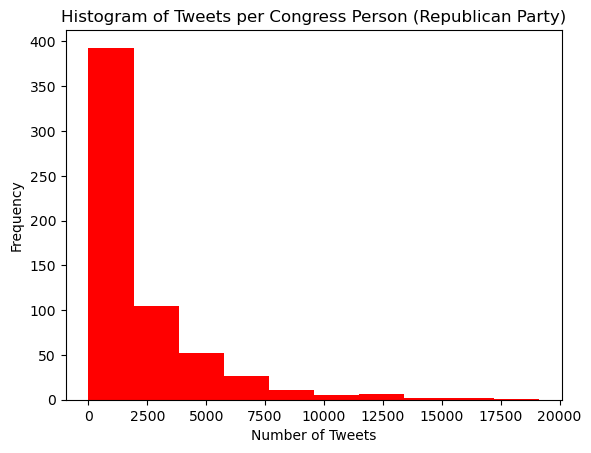

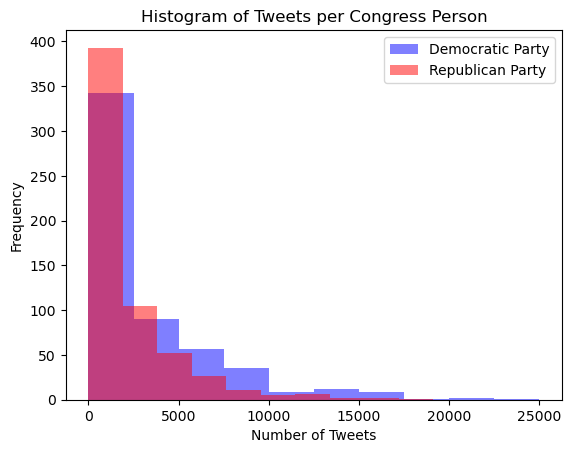

In [212]:
import matplotlib.pyplot as plt

r_tweets = summary_df.loc[summary_df['party'] == 'r', 'tweets_per_congress_person']
d_tweets = summary_df.loc[summary_df['party'] == 'd', 'tweets_per_congress_person']

plt.hist(r_tweets, color='red')
plt.xlabel('Number of Tweets')
plt.ylabel('Frequency')
plt.title('Histogram of Tweets per Congress Person (Republican Party)')
plt.show()
plt.hist(d_tweets, color='blue', alpha=0.5, label='Democratic Party') 
plt.hist(r_tweets, color='red', alpha=0.5, label='Republican Party') 
plt.xlabel('Number of Tweets') 
plt.ylabel('Frequency') 
plt.title('Histogram of Tweets per Congress Person') 
plt.legend() 
plt.show()



In [162]:
i=0
congress_name_index = congress_names.index(data['name'][i])

In [163]:
party_by_congress_person[congress_name_index] == -1

True

In [26]:
summary_df = pd.DataFrame({'name': congress_names, 'tweets_per_congress_person': tweets_per_congress_person})

merged_df = pd.merge(data,summary_df, on='name')



In [27]:
merged_df

,name,party,twitter_lower,years,chamber,state,postedAt,source,tweetId,name_standardized,text,tweets_per_congress_person
0,Josh Gottheimer D-NJ,D,repjoshg,2021_2022,House,NJ,2022-05-29 13:22:24.171,PolitWoops,1530902377196314624,josh_gottheimer,Thanks to the Bipartisan Infrastructure Bill t...,9066
1,Josh Gottheimer D-NJ,D,repjoshg,2021_2022,House,NJ,2022-06-17 19:32:09.785,PolitWoops,1537880799852105728,josh_gottheimer,"With steps I'm taking, we can fight collusion ...",9066
2,Josh Gottheimer D-NJ,D,repjoshg,2021_2022,House,NJ,2021-04-04 16:25:57.100,PolitWoops,1378745665216462848,josh_gottheimer,To everyone celebrating in New Jersey's Fifth ...,9066
3,Josh Gottheimer D-NJ,D,repjoshg,2021_2022,House,NJ,2022-03-08 16:43:01.541,PolitWoops,1501237060606337024,josh_gottheimer,"The Russians are killing innocent civilians, v...",9066
4,Josh Gottheimer D-NJ,D,repjoshg,2021_2022,House,NJ,2021-01-31 01:55:13.708,PolitWoops,1355696105015701504,josh_gottheimer,We need to get a new bipartisan COVID-19 packa...,9066
...,...,...,...,...,...,...,...,...,...,...,...,...
2904266,Lynn Woolsey D-CA,D,replynnwoolsey,2011_2012,House,CA,2012-02-28 15:29:49.524,PolitWoops,174516663188856832,lynn_woolsey,I'm at @EdWorkforce markup fighting against da...,3
2904267,Lynn Woolsey D-CA,D,replynnwoolsey,2011_2012,House,CA,2012-02-28 17:03:01.437,PolitWoops,174540117371916288,lynn_woolsey,I was pleased to cut the ribbon at the grand r...,3
2904268,Byron Donalds R-FL,R,repdonaldspress,2021_2022,House,FL,2021-01-06 17:27:00.582,PolitWoops,1346870898800943104,byron_donalds,.@ByronDonalds,1
2904269,"Johnson, Bill",R,repbilljohnson,N/A,House,OH,2024-01-19 14:25:41.000,NOMIC,1748351025600163875,bill_johnson,Yesterday was my last workday in the U.S. Hous...,2


In [17]:
list(tweets_per_congress_person).index(max(tweets_per_congress_person))


872

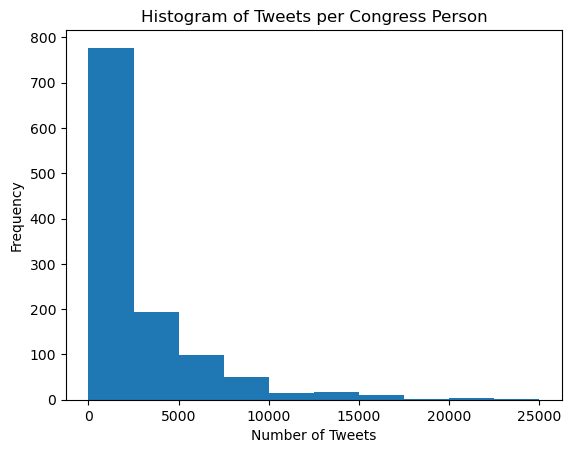

In [13]:
plt.hist(tweets_per_congress_person)
plt.xlabel('Number of Tweets')
plt.ylabel('Frequency')
plt.title('Histogram of Tweets per Congress Person')
plt.show()


In [3]:
import nomic
from nomic import AtlasDataset
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

nomic.login("nk-2LSEn5FB5h04Dn0pFLuZ9jDw7ZaMbPpYPV88wbKKASc")
dataset = AtlasDataset('hivemind/tweets-from-members-of-us-congress-from-all-time-updated-2024-06-10')


2024-06-26 09:48:44.730 | INFO     | nomic.dataset:__init__:829 - Loading existing dataset `hivemind/tweets-from-members-of-us-congress-from-all-time-updated-2024-06-10`.


In [4]:
embds = dataset.maps[0].embeddings.latent

KeyboardInterrupt: 